# Exploratory Analysis of House Prices

## 1. Initial Data Exploration
- The dataset contains **2,000 records** of house prices, with features such as **Number of Bedrooms**, **Bathrooms**, **Square Footage**, **Location**, **Condition**, **Garage Presence**, and **Year Built**.
- Data inspection showed no missing values in the dataset, ensuring complete data in all columns. 

## 2. Distribution of Houses by Key Features
- **Garage Presence**: Houses are nearly evenly split, with 48.1% having garages and 51.9% without.
- **Location**: The distribution of houses by location shows:
  - Downtown: 558 houses (27.9%)
  - Urban: 485 houses (24.3%)
  - Suburban: 483 houses (24.2%)
  - Rural: 474 houses (23.7%)
  - *Observation*: Downtown has slightly more houses, but the distribution across locations is relatively balanced.

- **Bedroom Count**: The dataset includes a similar distribution across 1- to 5-bedroom houses, with no clear relationship between bedroom count and house price.
- **Bathroom Count**: Houses vary between 1 to 4 bathrooms, with a nearly equal distribution.

## 3. Impact of Garage Presence on House Prices
- The average house prices for homes **with and without garages** were compared:
  - Houses with garages have a slightly higher average price than those without, though the difference is minimal.
- A one-way ANOVA test yielded a **p-value of 0.89**, indicating no statistically significant difference in house prices based on garage presence.
- Both histograms and box plots show similar price distributions for houses with and without garages, with no outliers detected.

## 4. Impact of Location on House Prices
- **Average House Prices by Location**:
  - Downtown: $536,059.67
  - Rural: $538,613.94
  - Suburban: $557,416.33
  - Urban: $518,963.55
  - *Observation*: Houses in suburban areas tend to have slightly higher prices, while urban areas have the lowest average prices.

- **Statistical Analysis**:
  - An ANOVA test for location yielded a **p-value of 0.194**, indicating that location does not significantly impact house prices.
  - A box plot shows the price distribution by location, with suburban areas displaying a slightly higher price range, though not statistically significant.

## 5. Impact of Bedroom Count on House Prices
- The mean prices by bedroom count showed slight variations, but there is no strong trend or correlation between bedroom count and house prices.
- An ANOVA test for bedroom count revealed no statistically significant difference in prices across bedroom counts.

## 6. Impact of Bathroom Count on House Prices
- The average house prices based on bathroom count showed minimal variations, with no significant impact on prices.
- An ANOVA test for bathroom count resulted in a **p-value of 0.13**, indicating no significant influence of bathroom count on house prices.

## 7. Average House Price Over Time
- A line plot of house prices over time (based on year built) for houses with different features (garage presence, location, bedroom, and bathroom count) shows fluctuating prices with no consistent trend suggesting a strong impact from any specific feature over time.

## 8. Outliers in House Prices
- Outliers were identified using the **Interquartile Range (IQR)** method across garage presence, bedroom count, bathroom count, and location.
- **No outliers** were detected in any category, indicating a consistent price distribution within each feature.

## 9. Correlation Analysis
- **Garage Presence**: Scatter plots and correlation analysis showed no correlation (correlation coefficient of 0.0) between garage presence and house prices.
- **Bedroom Count**: Analysis revealed no significant relationship between bedroom count and house prices.
- **Bathroom Count**: Similarly, no significant correlation was found between bathroom count and house prices.
- **Location**: The ANOVA and Chi-Square tests confirmed that location does not significantly influence house prices, with a p-value of 0.19432.

## 10. Analysis by Location and Condition
- Houses were also analyzed by **location** and **condition** (Excellent, Fair, Good, Poor).
- The average prices by location and condition showed minimal differences, indicating that condition does not play a substantial role in price variations across locations.

## Overall Observations
- The analysis indicates that **Garage Presence**, **Bedroom Count**, **Bathroom Count**, and **Location** have weak or no statistically significant influence on house prices in this dataset.
- Other factors not included in this dataset, such as house renovation status, amenities, or neighborhood specifics, may play a more significant role in determining house prices.

## Conclusion
The analysis suggests that none of the examined features (garage presence, bedroom and bathroom counts, location, or condition) significantly impact house prices based on statistical tests and visualizations. This indicates that other unobserved factors might contribute more meaningfully to price variations in the housing market.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from pathlib import Path

In [10]:
# File to Load _to_load
house_path = Path ("data/House_Price_Prediction_Dataset.csv")

In [12]:
# Read House Price Data File and store into Pandas DataFrames
house_df = pd.read_csv(house_path)

In [14]:
# Display the first few rows of the dataset 
house_df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [16]:
# Count the total number of IDs
total_ids = house_df['Id'].count()

# Count the number of unique IDs
unique_ids = house_df['Id'].nunique()

# Print the results
print(f"Total number of IDs: {total_ids}")
print(f"Number of unique IDs: {unique_ids}")

# Check if there are duplicate IDs
duplicate_ids = total_ids - unique_ids
print(f"Number of duplicate IDs: {duplicate_ids}")


Total number of IDs: 2000
Number of unique IDs: 2000
Number of duplicate IDs: 0


In [18]:
# Display information about the dataset, including data types and non-null counts
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [20]:
# Count the number of houses with and without a garage
garage_counts = house_df['Garage'].value_counts()

# Display the results
print(garage_counts)


Garage
No     1038
Yes     962
Name: count, dtype: int64


In [22]:
# Using the aggregation method to generate summary statistics for house prices by garage presence
summary_stats_df = house_df.groupby('Garage')['Price'].agg(
    Mean="mean",
    Median="median",
    Variance="var",
    Std_Dev="std",
    SEM="sem"
)

# Display the summary statistics
summary_stats_df

,Mean,Median,Variance,Std_Dev,SEM
Garage,,,,,
No,536920.700385,542865.5,7.742101e+10,278246.304279,8636.359814
Yes,538492.747401,533877.0,7.540331e+10,274596.636620,8853.350896


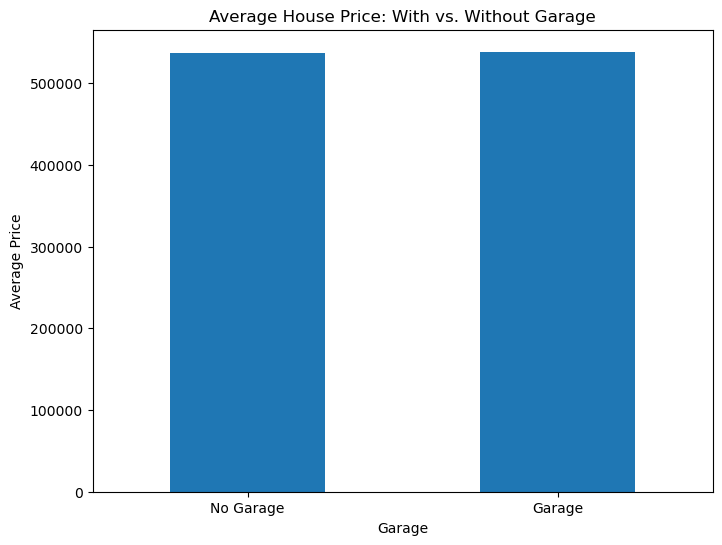

In [37]:
# Calculate the average house price based on garage presence
garage_price_comparison = house_df.groupby('Garage')['Price'].mean()

# Now plot the bar chart
garage_price_comparison.plot(kind='bar', figsize=(8, 6))
plt.title("Average House Price: With vs. Without Garage")
plt.xlabel("Garage")
plt.ylabel("Average Price")
plt.xticks(ticks=[0, 1], labels=['No Garage', 'Garage'], rotation=0)

# Save the plot to your desired folder
plt.savefig('C:/Users/somay/OneDrive/Boot Camp/Class Activity/Project 1/Group_9_Project_1/Plots/Bar_plot.png', format='png', dpi=300)

# Show the plot
plt.show()

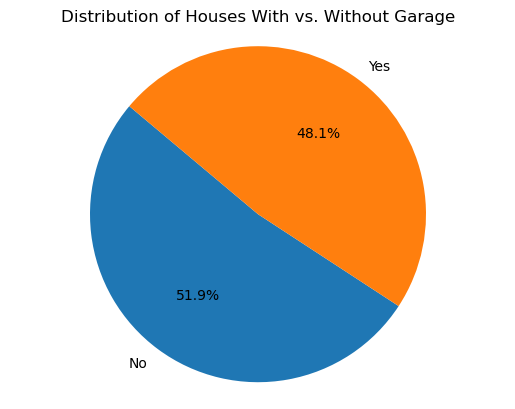

In [39]:
# Get the count of houses with and without a garage
garage_counts = house_df['Garage'].value_counts()

# Make the pie chart based on garage presence
garage_pie = garage_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    title='Distribution of Houses With vs. Without Garage',
    ylabel=''  # Set ylabel to empty to avoid label overlap
)

# Make the axis equal to ensure the pie chart is circular
plt.axis('equal')

# Save the plot to your desired folder
plt.savefig('C:/Users/somay/OneDrive/Boot Camp/Class Activity/Project 1/Group_9_Project_1/Plots/Pie_plot.png', format='png', dpi=300)

# Show the plot
plt.show()


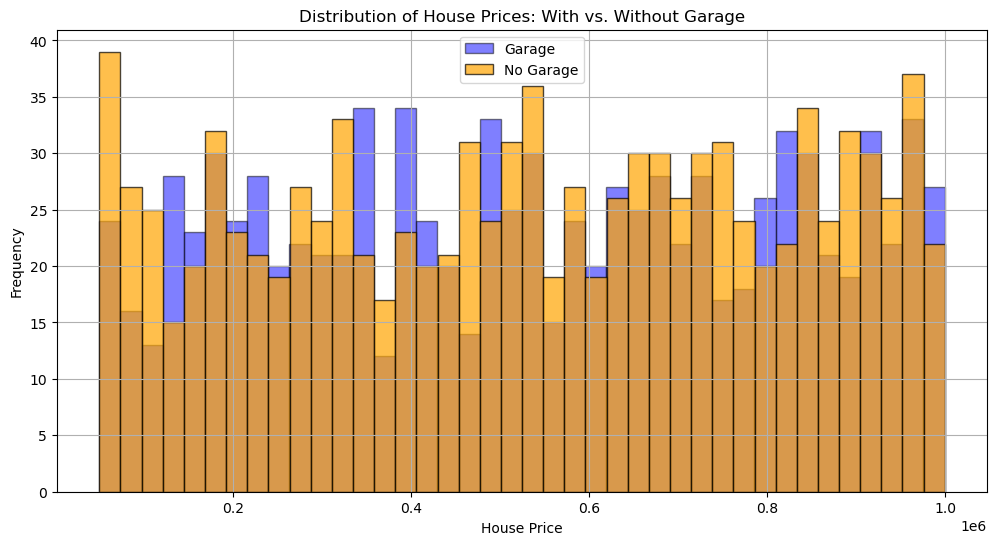

In [41]:
# Plotting a histogram to compare the distribution of house prices with and without garages

# Set the size of the figure
plt.figure(figsize=(12, 6))

# Plot a histogram for house prices with garages
house_df[house_df['Garage'] == 'Yes']['Price'].hist(
    alpha=0.5, label='Garage', bins=40, color='blue', edgecolor='black'
)

# Plot a histogram for house prices without garages
house_df[house_df['Garage'] == 'No']['Price'].hist(
    alpha=0.7, label='No Garage', bins=40, color='orange', edgecolor='black'
)

# Add title and labels
plt.title('Distribution of House Prices: With vs. Without Garage')
plt.xlabel('House Price')
plt.ylabel('Frequency')

# Add legend to indicate which distribution represents houses with/without garages
plt.legend()

# Save the plot to your desired folder
plt.savefig('C:/Users/somay/OneDrive/Boot Camp/Class Activity/Project 1/Group_9_Project_1/Plots/Histogram_plot.png', format='png', dpi=300)

# Display the plot
plt.show()

In [43]:
# Calculate Quartiles and Identify Outliers for House Prices Based on Garage Presence

# Calculate the 25th, 50th (median), and 75th percentiles for house prices based on garage presence
quartiles = house_df.groupby('Garage')['Price'].quantile([0.25, 0.5, 0.75]).unstack()

# Display the quartiles for 'No Garage' and 'Garage' groups
print("Quartiles for house prices based on garage presence:\n", quartiles)

# Calculate the Interquartile Range (IQR)
IQR = quartiles[0.75] - quartiles[0.25]

# Calculate lower and upper bounds for detecting outliers
lower_bound = quartiles[0.25] - 1.5 * IQR
upper_bound = quartiles[0.75] + 1.5 * IQR

# Display the IQR, lower and upper bounds
print("\nInterquartile Range (IQR):\n", IQR)
print("\nLower Bound for Outliers:\n", lower_bound)
print("\nUpper Bound for Outliers:\n", upper_bound)

# Identify potential outliers for 'No Garage' houses
outliers_no_garage = house_df[(house_df['Garage'] == 'No') & 
                                ((house_df['Price'] < lower_bound['No']) | 
                                 (house_df['Price'] > upper_bound['No']))]

# Identify potential outliers for 'Garage' houses
outliers_garage = house_df[(house_df['Garage'] == 'Yes') & 
                             ((house_df['Price'] < lower_bound['Yes']) | 
                              (house_df['Price'] > upper_bound['Yes']))]

# Display the number of outliers for each group
print("\nNumber of outliers for houses without a garage:", outliers_no_garage.shape[0])
print("Number of outliers for houses with a garage:", outliers_garage.shape[0])


Quartiles for house prices based on garage presence:
              0.25      0.50       0.75
Garage                                
No      297586.50  542865.5  773735.75
Yes     305359.75  533877.0  787028.50

Interquartile Range (IQR):
 Garage
No     476149.25
Yes    481668.75
dtype: float64

Lower Bound for Outliers:
 Garage
No    -416637.375
Yes   -417143.375
dtype: float64

Upper Bound for Outliers:
 Garage
No     1487959.625
Yes    1509531.625
dtype: float64

Number of outliers for houses without a garage: 0
Number of outliers for houses with a garage: 0


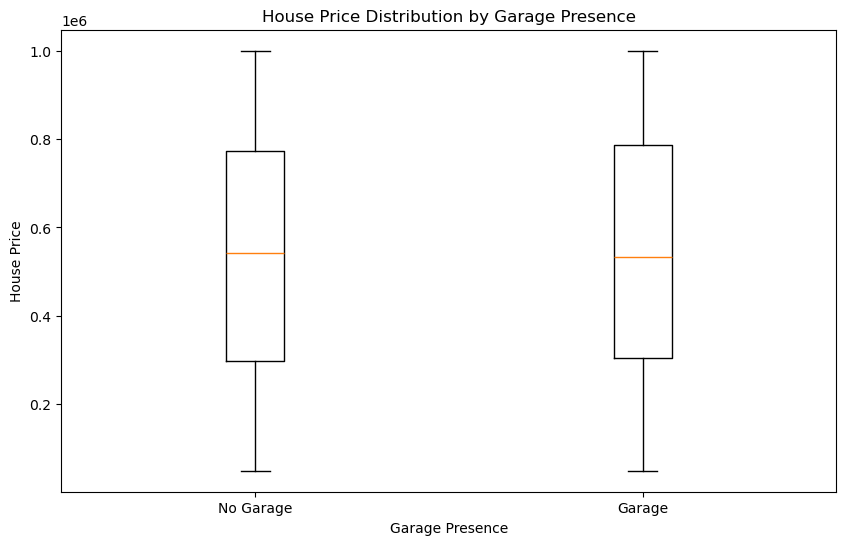

In [47]:
# Prepare data for boxplot: list of house prices for each garage category
garage_price_data = [
   house_df[house_df['Garage'] == 'No']['Price'],
    house_df[house_df['Garage'] == 'Yes']['Price']
]

# Plotting the boxplot for house prices based on garage presence
plt.figure(figsize=(10, 6))
plt.boxplot(garage_price_data, labels=['No Garage', 'Garage'], 
            flierprops=dict(marker='o', color='red', markersize=8))

# Add titles and labels
plt.title('House Price Distribution by Garage Presence')
plt.xlabel('Garage Presence')
plt.ylabel('House Price')

# Save the plot to your desired folder
plt.savefig('C:/Users/somay/OneDrive/Boot Camp/Class Activity/Project 1/Group_9_Project_1/Plots/Box_plot.png', format='png', dpi=300)

# Show the plot
plt.show()


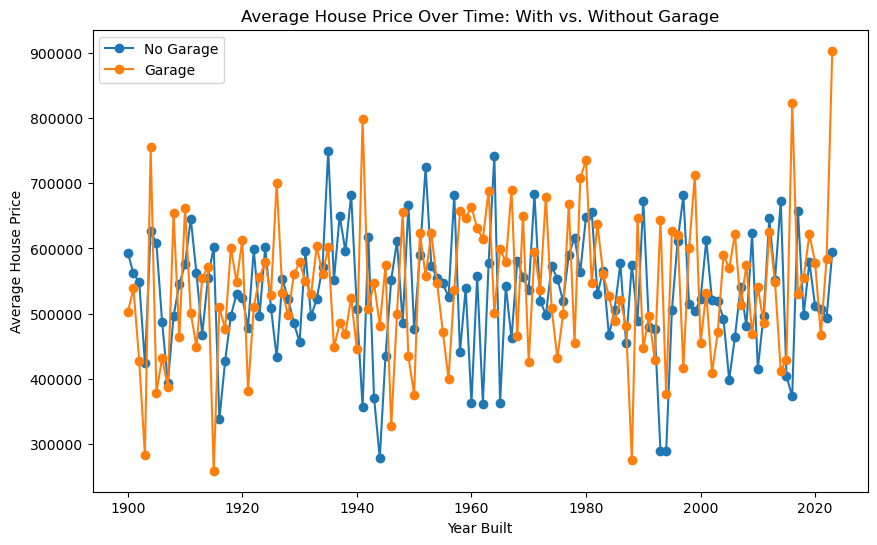

In [49]:
# Calculate the average house price by year built for each garage category
avg_price_by_year = house_df.groupby(['YearBuilt', 'Garage'])['Price'].mean().reset_index()

# Filter data for houses with and without garages
no_garage_data = avg_price_by_year[avg_price_by_year['Garage'] == 'No']
garage_data = avg_price_by_year[avg_price_by_year['Garage'] == 'Yes']

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(no_garage_data['YearBuilt'], no_garage_data['Price'], label='No Garage', marker='o')
plt.plot(garage_data['YearBuilt'], garage_data['Price'], label='Garage', marker='o')

# Add titles and labels
plt.title('Average House Price Over Time: With vs. Without Garage')
plt.xlabel('Year Built')
plt.ylabel('Average House Price')
plt.legend()

# Save the plot to your desired folder
plt.savefig('C:/Users/somay/OneDrive/Boot Camp/Class Activity/Project 1/Group_9_Project_1/Plots/Line_plot_Total.png', format='png', dpi=300)

# Show the plot
plt.show()


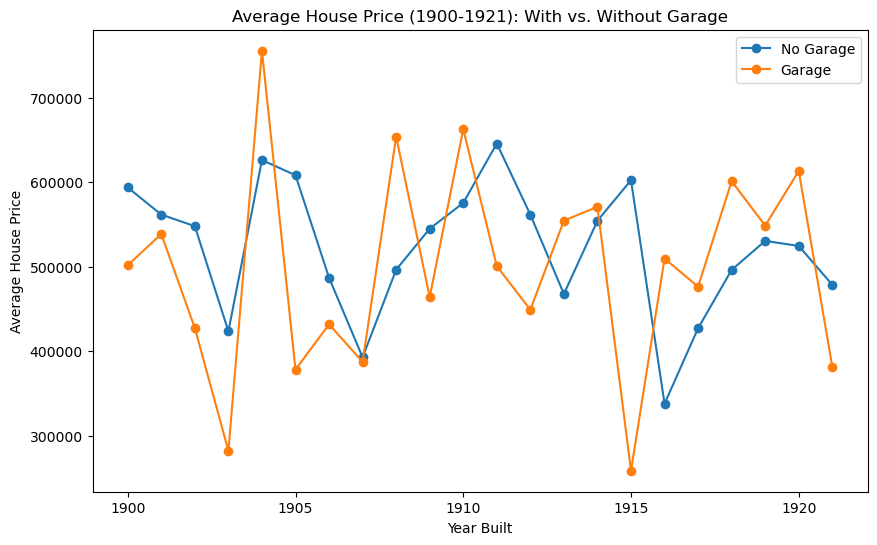

In [51]:
# Filter data for houses built from 1900 to 1920
early_data = avg_price_by_year[(avg_price_by_year['YearBuilt'] >= 1900) & (avg_price_by_year['YearBuilt'] <= 1921)]

# Filter for houses with and without garages
early_no_garage = early_data[early_data['Garage'] == 'No']
early_garage = early_data[early_data['Garage'] == 'Yes']

# Plotting the line plot for early years
plt.figure(figsize=(10, 6))
plt.plot(early_no_garage['YearBuilt'], early_no_garage['Price'], label='No Garage', marker='o')
plt.plot(early_garage['YearBuilt'], early_garage['Price'], label='Garage', marker='o')

# Add titles and labels
plt.title('Average House Price (1900-1921): With vs. Without Garage')
plt.xlabel('Year Built')
plt.ylabel('Average House Price')
plt.legend()

# Save the plot to your desired folder
plt.savefig('C:/Users/somay/OneDrive/Boot Camp/Class Activity/Project 1/Group_9_Project_1/Plots/Line_plot_Head.png', format='png', dpi=300)

# Show the plot
plt.show()


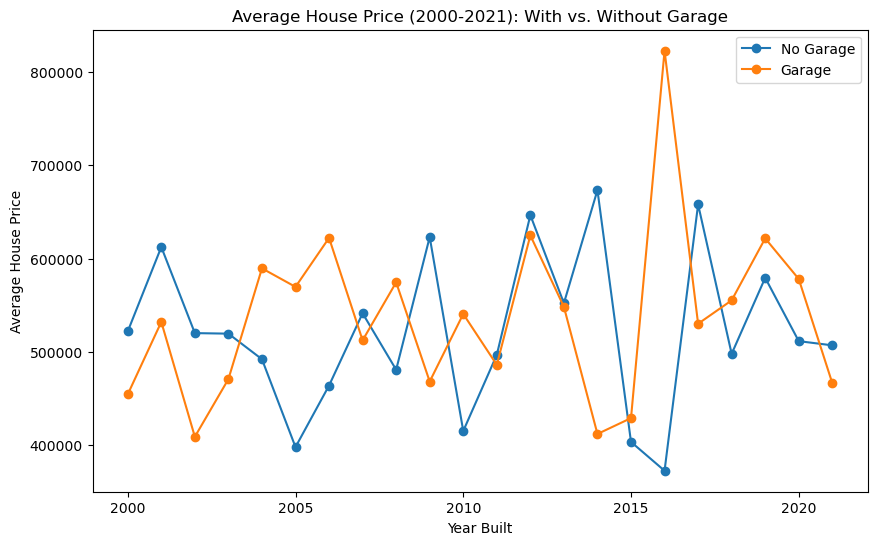

In [53]:
# Filter data for houses built from 2000 to 2020
recent_data = avg_price_by_year[(avg_price_by_year['YearBuilt'] >= 2000) & (avg_price_by_year['YearBuilt'] <= 2021)]

# Filter for houses with and without garages
recent_no_garage = recent_data[recent_data['Garage'] == 'No']
recent_garage = recent_data[recent_data['Garage'] == 'Yes']

# Plotting the line plot for recent years
plt.figure(figsize=(10, 6))
plt.plot(recent_no_garage['YearBuilt'], recent_no_garage['Price'], label='No Garage', marker='o')
plt.plot(recent_garage['YearBuilt'], recent_garage['Price'], label='Garage', marker='o')

# Add titles and labels
plt.title('Average House Price (2000-2021): With vs. Without Garage')
plt.xlabel('Year Built')
plt.ylabel('Average House Price')
plt.legend()

# Save the plot to your desired folder
plt.savefig('C:/Users/somay/OneDrive/Boot Camp/Class Activity/Project 1/Group_9_Project_1/Plots/Line_plot_Tail.png', format='png', dpi=300)

# Show the plot
plt.show()


In [55]:
# Separate house prices for houses with garages and without garages
garage_prices = house_df[house_df['Garage'] == 'Yes']['Price']
no_garage_prices = house_df[house_df['Garage'] == 'No']['Price']

# Perform a one-way ANOVA test to compare the mean prices between the two groups
st.f_oneway(garage_prices, no_garage_prices)

F_onewayResult(statistic=0.016139607479556336, pvalue=0.898920134240627)

In [ ]:
# Calculate observed data: count of houses with and without a garage
observed = pd.Series([house_df['Garage'].value_counts()['Yes'], 
house_df['Garage'].value_counts()['No']], 
index=["Garage", "No Garage"])

# Create a DataFrame for better visualization
df = pd.DataFrame([observed]).T

# Add a column for expected values (assuming equal distribution)
df[1] = observed.sum() / 2

# Rename the columns
df.columns = ["observed", "expected"]

# View the DataFrame
df

,observed,expected
Garage,962,1000.0
No Garage,1038,1000.0


In [ ]:
# Calculate the critical value at 95% confidence level with 1 degree of freedom
critical_value = st.chi2.ppf(q=0.95, df=1)

# Print the critical value
print(f"The critical value: {critical_value}")


The critical value: 3.841458820694124


In [ ]:
# Run the Chi-Square test
st.chisquare(df['observed'], df['expected'])

Power_divergenceResult(statistic=2.888, pvalue=0.08924164599420346)

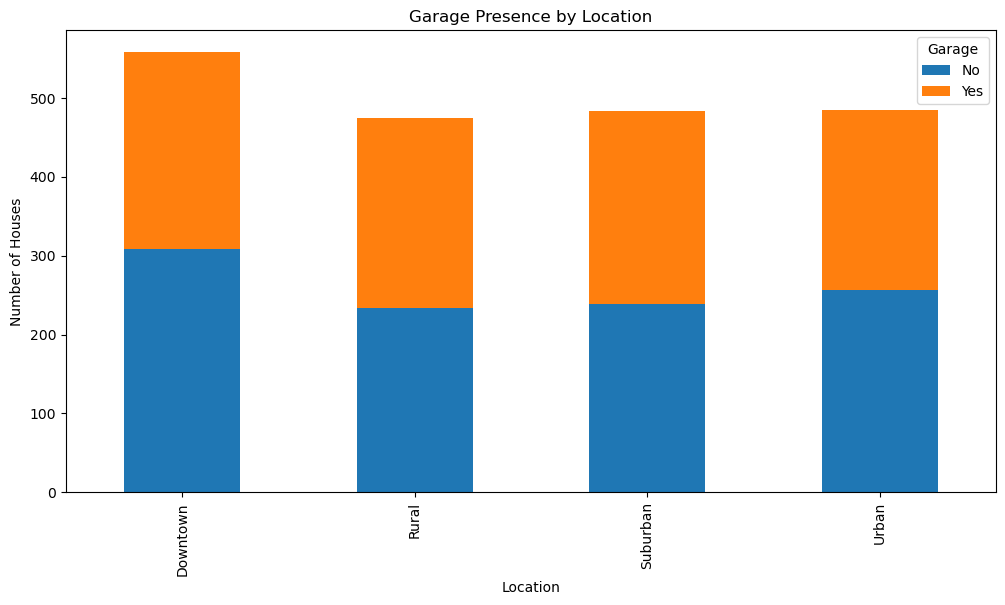

In [ ]:
# Group data by 'Location' and 'Garage' to see distribution
garage_by_location = house_df.groupby(['Location', 'Garage']).size().unstack().fillna(0)

# Plotting a stacked bar chart to visualize garage presence by location
garage_by_location.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Garage Presence by Location')
plt.xlabel('Location')
plt.ylabel('Number of Houses')

# Save the plot to your desired folder
plt.savefig('C:/Users/somay/OneDrive/Boot Camp/Class Activity/Project 1/Group_9_Project_1/Plots/Stacked_Bar_plot.png', format='png', dpi=300)

# Show the plot
plt.show()


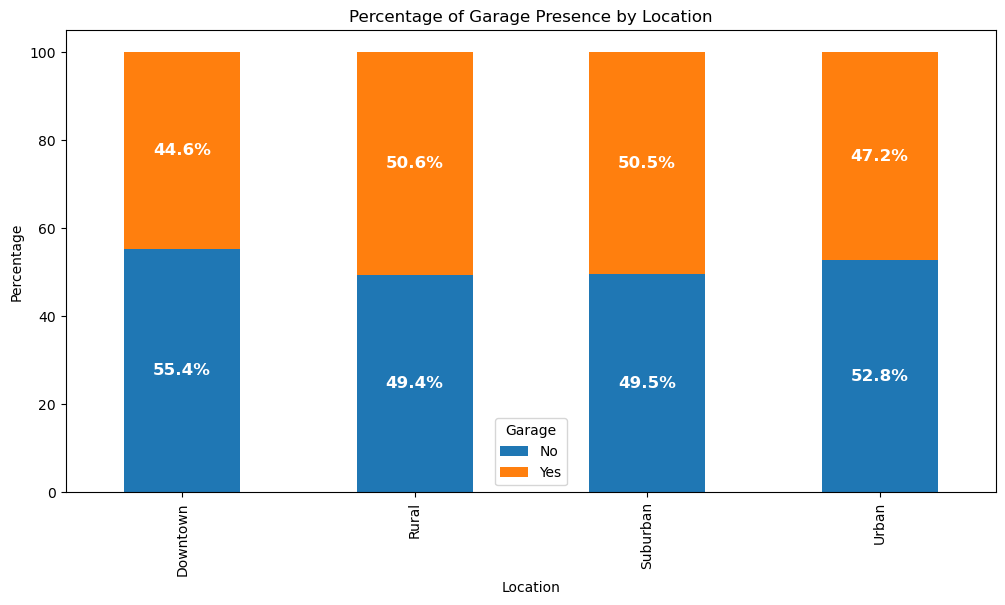

In [ ]:
# Calculate percentage distribution of garage presence by location
garage_percent = garage_by_location.div(garage_by_location.sum(axis=1), axis=0) * 100

# Plot the percentage distribution
ax = garage_percent.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Percentage of Garage Presence by Location')
plt.xlabel('Location')
plt.ylabel('Percentage')
plt.legend(title='Garage')

# Add percentage labels on the bars
for location in range(len(garage_percent.index)):
    cumulative_sum = 0  # Track cumulative sum of the percentages for positioning the labels
    for garage in range(len(garage_percent.columns)):
        percentage = garage_percent.iloc[location, garage]
        if percentage > 0:  # Only show non-zero values
            cumulative_sum += percentage
            plt.text(
                location, 
                cumulative_sum - (percentage / 2),  # Adjust the label position
                f'{percentage:.1f}%', 
                ha='center', 
                va='center', 
                color='white', 
                fontsize=12, 
                fontweight='bold'
            )

# Save the plot to your desired folder
plt.savefig('C:/Users/somay/OneDrive/Boot Camp/Class Activity/Project 1/Group_9_Project_1/Plots/Percentage_Stacked_Bar_plot.png', format='png', dpi=300)

# Show the plot
plt.show()


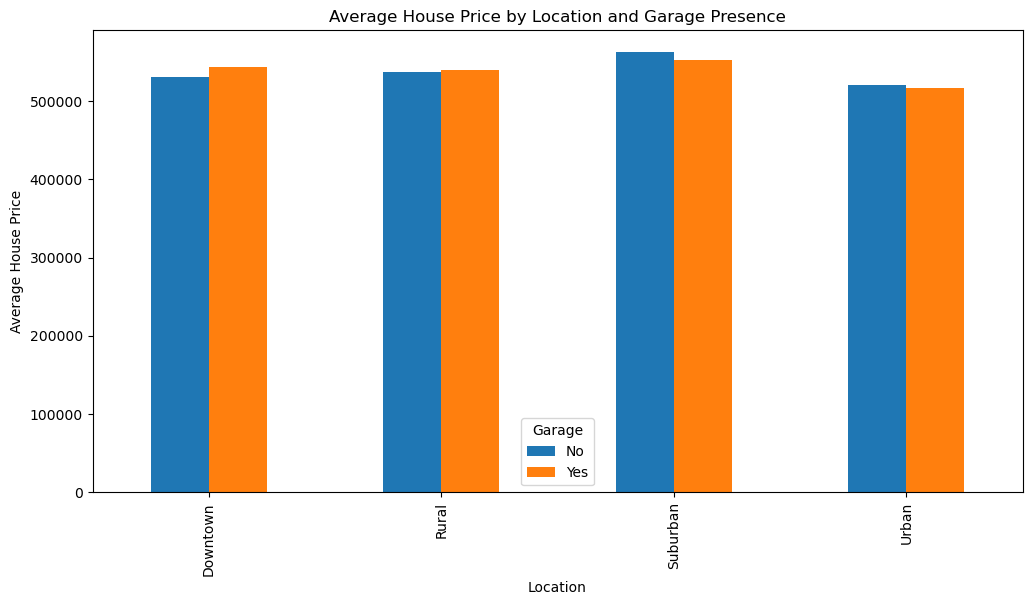

In [ ]:
# Group by location and garage presence to calculate average prices
avg_price_loc_garage = house_df.groupby(['Location', 'Garage'])['Price'].mean().unstack()

# Plot the average house price by location and garage presence
avg_price_loc_garage.plot(kind='bar', figsize=(12, 6))
plt.title('Average House Price by Location and Garage Presence')
plt.xlabel('Location')
plt.ylabel('Average House Price')

# Save the plot to your desired folder
plt.savefig('C:/Users/somay/OneDrive/Boot Camp/Class Activity/Project 1/Group_9_Project_1/Plots/Location_Garage_Bar_plot.png', format='png', dpi=300)

# Show the plot
plt.show()


In [ ]:

# Create the observed data: contingency table for Garage and Location
observed = pd.crosstab(house_df['Garage'], house_df['Location'])

# Create a DataFrame for better visualization (optional)
observed_df = pd.DataFrame(observed)

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(observed)

# Convert expected values to a DataFrame for better visualization
expected_df = pd.DataFrame(expected, index=observed.index, columns=observed.columns)

# Display observed and expected as DataFrames
print("Observed Values:")
display(observed)

print("\nExpected Values:")
display(expected_df)

# Calculate the critical value at 95% confidence level
critical_value = chi2.ppf(q=0.95, df=dof)
print(f"\nChi-Square Statistic: {chi2_stat}")
print(f"Critical Value: {critical_value}")
print(f"p-value: {p_value}")

# Interpret the result
if chi2_stat >= critical_value:
    print("Reject the null hypothesis: There is a significant association between garage presence and location.")
else:
    print("Fail to reject the null hypothesis: No significant association between garage presence and location.")


Observed Values:


Location,Downtown,Rural,Suburban,Urban
Garage,,,,
No,309,234,239,256
Yes,249,240,244,229



Expected Values:


Location,Downtown,Rural,Suburban,Urban
Garage,,,,
No,289.602,246.006,250.677,251.715
Yes,268.398,227.994,232.323,233.285



Chi-Square Statistic: 5.2019264700108
Critical Value: 7.814727903251179
p-value: 0.15759433179020305
Fail to reject the null hypothesis: No significant association between garage presence and location.


In [ ]:
# Our data should be uniquely identified by House ID, number of bedrooms, location, 
# floors, yearbuilt, condition, and price to make sure there are no duplicates in the data
house_bedroom = house_df.loc[house_df.duplicated(subset=["Id", "Bedrooms", "Location", "Floors", "YearBuilt",
                                                         "Condition", "Price",]),"Id"].unique()
house_bedroom

array([], dtype=int64)

In [ ]:
# Create a clean DataFrame by having House Id, number of Bedrooms, Location, Floors, 
# YearBuilt, Condition, and Price as columns
house_bedroom_df = house_df[["Id", "Bedrooms", "Location", "Floors", "YearBuilt",
                             "Condition", "Price"]]
house_bedroom_df.head()

,Id,Bedrooms,Location,Floors,YearBuilt,Condition,Price
0,1,5,Downtown,3,1970,Excellent,149919
1,2,5,Downtown,3,1958,Excellent,424998
2,3,2,Downtown,3,1938,Good,266746
3,4,4,Suburban,2,1902,Fair,244020
4,5,1,Downtown,2,1975,Fair,636056


In [ ]:
# Grouping the number of bedrooms per house to see price differences
bedroom_dict = {}

# Loop through each unique bedroom count
for bedroom_count in house_bedroom_df["Bedrooms"].unique():
    # Filter the DataFrame for the current bedroom count
    houses = house_bedroom_df[house_bedroom_df["Bedrooms"] == bedroom_count]
    # Store the house details in the dictionary
    bedroom_dict[bedroom_count] = houses[["Id", "Location", "Floors", "YearBuilt", "Condition", "Price"]]

# Display the results for each bedroom count
for bedroom_count, data in bedroom_dict.items():
    print(f"\nHouses with {bedroom_count} bedrooms:")
    print(data)


Houses with 5 bedrooms:
        Id  Location  Floors  YearBuilt  Condition   Price
0        1  Downtown       3       1970  Excellent  149919
1        2  Downtown       3       1958  Excellent  424998
19      20  Downtown       2       2016  Excellent  218767
24      25     Urban       3       1900  Excellent  688668
25      26     Urban       2       1959       Good  527032
...    ...       ...     ...        ...        ...     ...
1989  1990     Rural       3       1919  Excellent   60002
1995  1996  Suburban       3       1923       Poor  295620
1996  1997  Suburban       1       2019       Poor  580929
1997  1998     Rural       2       1903       Poor  476925
1999  2000  Suburban       3       1903       Fair  482525

[403 rows x 6 columns]

Houses with 2 bedrooms:
        Id  Location  Floors  YearBuilt  Condition   Price
2        3  Downtown       3       1938       Good  266746
7        8  Suburban       1       1925       Good  594893
8        9     Rural       1       1932  

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of bedrooms and prices

# mean, median, variance, standard deviation, and SEM of the prices per bedroom count.
# Assemble the resulting series into a single summary DataFrame.
# Grouping by the number of bedrooms
bedroom_groups = house_bedroom_df.groupby("Bedrooms")["Price"]

# Calculating summary statistics
mean_price = bedroom_groups.mean()
median_price = bedroom_groups.median()
price_variance = bedroom_groups.var()
price_std_dev = bedroom_groups.std()
price_sem = bedroom_groups.sem()

# Creating a summary DataFrame
summary_statistics_df = pd.DataFrame({
    "Mean Price": mean_price,
    "Median Price": median_price, 
    "Price Variance": price_variance,
    "Price Std. Dev.": price_std_dev,
    "Price Std. Err.": price_sem
})

summary_statistics_df

,Mean Price,Median Price,Price Variance,Price Std. Dev.,Price Std. Err.
Bedrooms,,,,,
1,530561.622010,537497.5,7.914835e+10,281333.169201,13760.455102
2,545546.521739,528791.0,7.868252e+10,280504.042087,14622.283994
3,546977.894089,557577.0,7.218170e+10,268666.515802,13333.695299
4,533696.930864,535119.0,8.042240e+10,283588.429642,14091.622362
5,532500.124069,526657.0,7.225753e+10,268807.610292,13390.260835


In [ ]:
# Grouping by bedroom count
bedroom_groups = house_bedroom_df.groupby("Bedrooms")["Price"]

# Calculating quartiles
q1 = bedroom_groups.quantile(0.25)
median = bedroom_groups.median()
q3 = bedroom_groups.quantile(0.75)
iqr = q3 - q1

# Creating a DataFrame to display the quartiles and IQR
quartiles_df = pd.DataFrame({
    "1st Quartile": q1,
    "Median": median,
    "3rd Quartile": q3,
    "Interquartile Range (IQR)": iqr
})

quartiles_df

,1st Quartile,Median,3rd Quartile,Interquartile Range (IQR)
Bedrooms,,,,
1,282167.0,537497.5,771193.25,489026.25
2,302971.0,528791.0,798427.00,495456.00
3,317008.0,557577.0,776850.50,459842.50
4,290140.0,535119.0,786091.00,495951.00
5,309730.5,526657.0,762441.50,452711.00


<Figure size 1000x600 with 0 Axes>

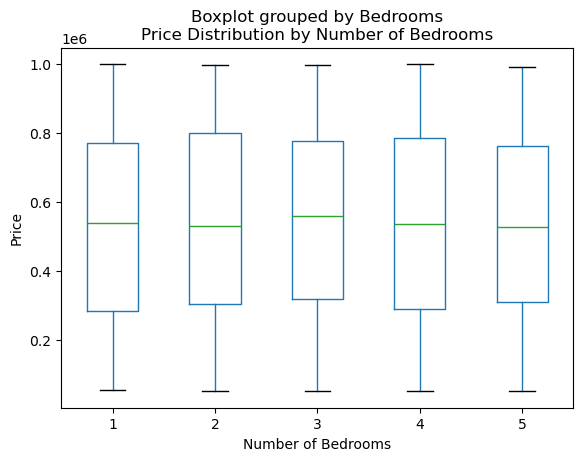

In [ ]:
# Plotting a box plot to show price distribution by bedroom count
plt.figure(figsize=(10, 6))
house_bedroom_df.boxplot(column="Price", by="Bedrooms", grid=False)
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.title("Price Distribution by Number of Bedrooms")
plt.show()

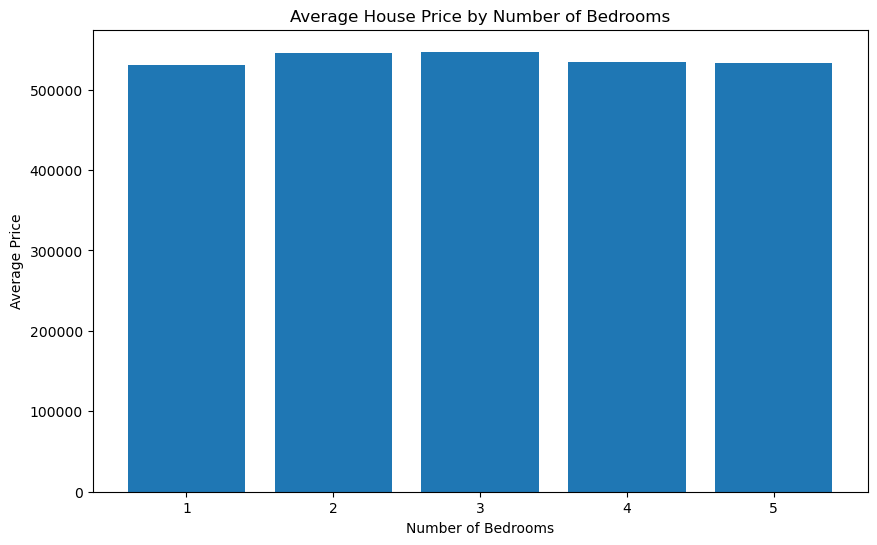

In [ ]:
# Calculate the average price by bedroom count
average_prices = house_bedroom_df.groupby("Bedrooms")["Price"].mean()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(average_prices.index, average_prices.values)
plt.xlabel("Number of Bedrooms")
plt.ylabel("Average Price")
plt.title("Average House Price by Number of Bedrooms")
plt.show()

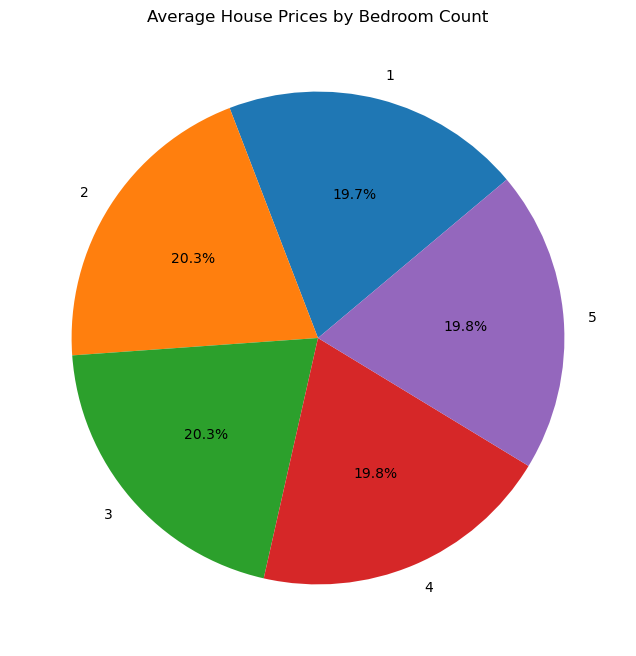

In [ ]:
# Calculate the average price by bedroom count
mean_price = house_bedroom_df.groupby("Bedrooms")["Price"].mean()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(mean_price, labels=mean_price.index, autopct="%1.1f%%", startangle=40)
plt.title("Average House Prices by Bedroom Count")
plt.show()

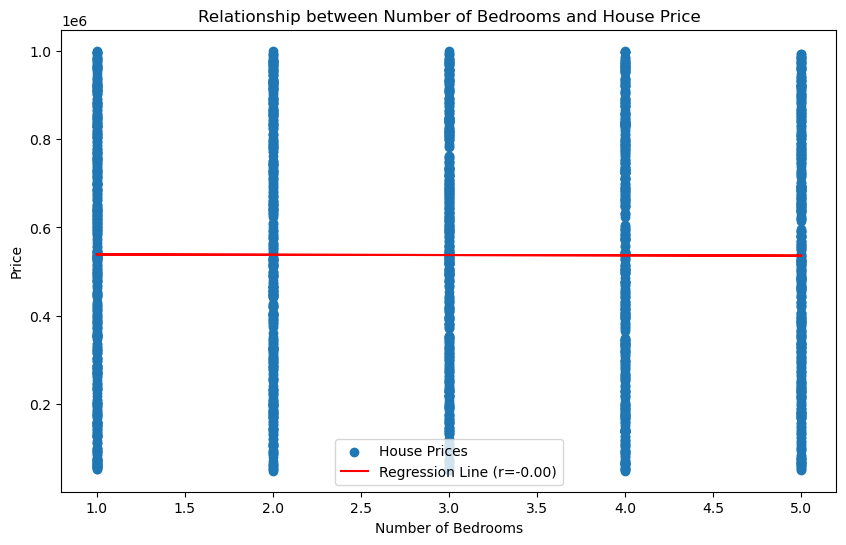

Correlation coefficient (r): -0.00
P-value: 8.77e-01


In [ ]:
# Extract bedroom count and price data
bedroom_count = house_bedroom_df["Bedrooms"]
prices = house_bedroom_df["Price"]

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(bedroom_count, prices)
regression_line = slope * bedroom_count + intercept

# Plotting the scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(bedroom_count, prices, label="House Prices")
plt.plot(bedroom_count, regression_line, color="red", label=f"Regression Line (r={r_value:.2f})")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.title("Relationship between Number of Bedrooms and House Price")
plt.legend()
plt.show()

# Displaying correlation
print(f"Correlation coefficient (r): {r_value:.2f}")
print(f"P-value: {p_value:.2e}")

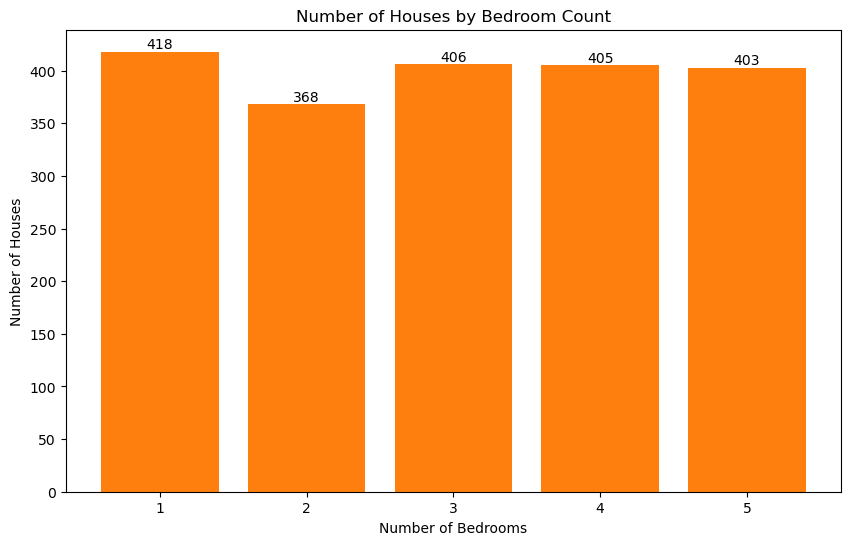

In [ ]:
# Count the number of houses observed for each bedroom count
house_counts = house_bedroom_df["Bedrooms"].value_counts().sort_index()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(house_counts.index, house_counts.values)

# Add labels to the bars
for bar in bars:
    val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, val, int(val), ha="center", va="bottom")
plt.bar(house_counts.index, house_counts.values)
plt.xlabel("Number of Bedrooms")
plt.ylabel("Number of Houses")
plt.title("Number of Houses by Bedroom Count")
plt.show()

In [ ]:
# Count the number of bathrooms in houses 
bathroom_counts = house_df['Bathrooms'].value_counts()

# Display the results
print(bathroom_counts)

Bathrooms
3    524
4    521
2    494
1    461
Name: count, dtype: int64


In [ ]:
# Using the aggregation method to generate summary statistics for house prices by bathroom count
bathroom_price_summary = house_df.groupby('Bathrooms')['Price'].agg(['mean', 'median', 'std', 'min', 'max'])

# Display the summary statistics
bathroom_price_summary

,mean,median,std,min,max
Bathrooms,,,,,
1,558757.752711,564922.0,270835.499640,51082,999453
2,516589.876518,514412.5,285602.943886,50005,999656
3,540201.713740,530710.0,275954.843455,53657,997719
4,536478.481766,553575.0,272235.651385,51845,996931


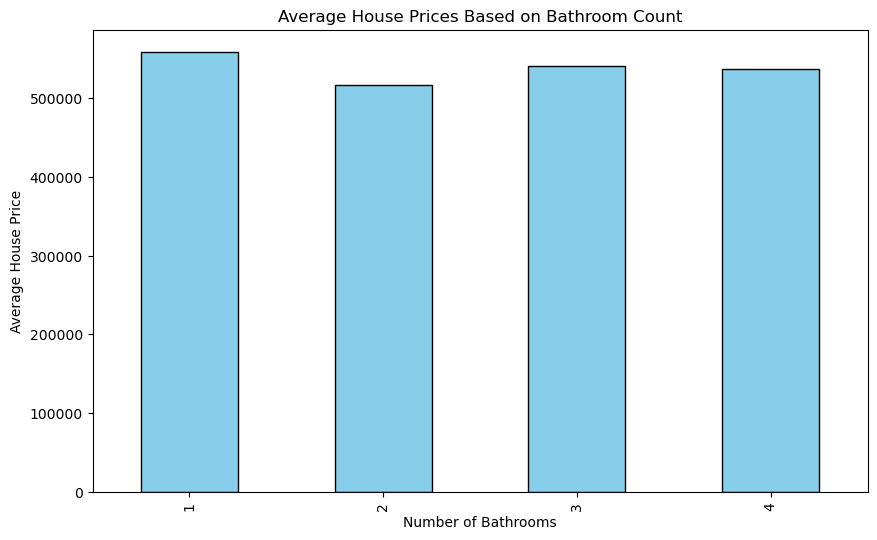

In [ ]:
# Plotting the average house prices based on bathroom count
plt.figure(figsize=(10, 6))
bathroom_price_summary['mean'].plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Average House Prices Based on Bathroom Count')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average House Price')

# Show the plot
plt.show()

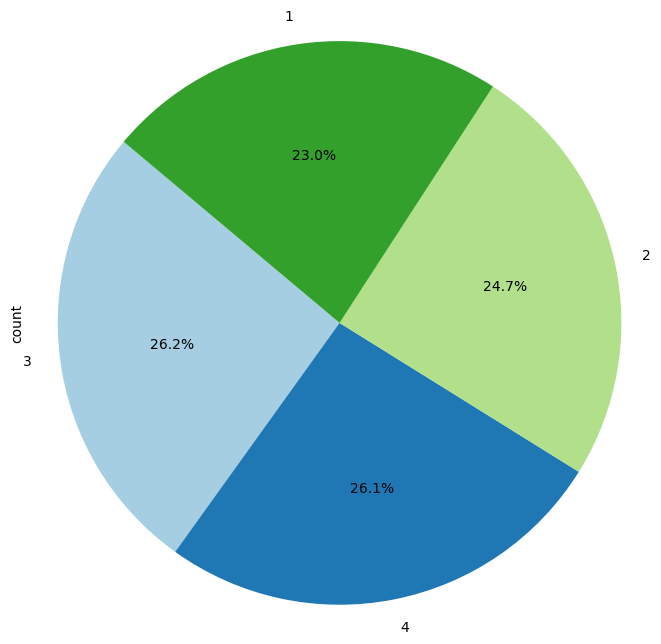

In [ ]:
# Get the count of houses based on the number of bathrooms
bathroom_counts = house_df['Bathrooms'].value_counts()

# Make the pie chart based on bathroom count
plt.figure(figsize=(8, 8))
bathroom_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(bathroom_counts))))

# Make the axis equal to ensure the pie chart is circular
plt.axis('equal')

# Show the plot
plt.show()

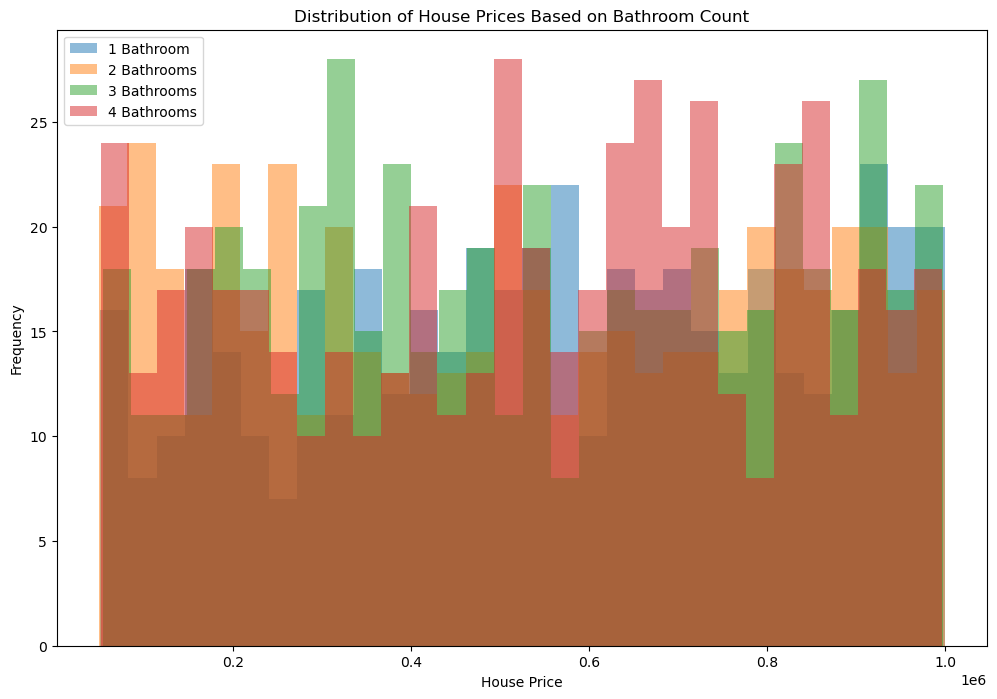

In [ ]:
# Plotting a histogram to compare the distribution of house prices based on bathroom count

# Set the size of the figure
plt.figure(figsize=(12, 8))

# Plot a histogram for house prices for 1 bathroom houses
plt.hist(house_df[house_df['Bathrooms'] == 1]['Price'], bins=30, alpha=0.5, label='1 Bathroom')

# Plot a histogram for house prices for 2 bathroom houses
plt.hist(house_df[house_df['Bathrooms'] == 2]['Price'], bins=30, alpha=0.5, label='2 Bathrooms')

# Plot a histogram for house prices for 3 bathroom houses
plt.hist(house_df[house_df['Bathrooms'] == 3]['Price'], bins=30, alpha=0.5, label='3 Bathrooms')

# Plot a histogram for house prices for 4 bathroom houses
plt.hist(house_df[house_df['Bathrooms'] == 4]['Price'], bins=30, alpha=0.5, label='4 Bathrooms')

# Add title and labels
plt.title('Distribution of House Prices Based on Bathroom Count')
plt.xlabel('House Price')
plt.ylabel('Frequency')

# Add legend to indicate which distribution represents houses based on bathroom count
plt.legend()

# Display the plot
plt.show()

In [ ]:
# Calculate Quartiles and Identify Outliers for House Prices Based on Bathroom Count

# Calculate the 25th, 50th (median), and 75th percentiles for house prices based on bathroom count
quartiles = house_df.groupby('Bathrooms')['Price'].quantile([0.25, 0.5, 0.75]).unstack()

# Display the quartiles for '1 bathroom', '2 bathrooms', '3 bathrooms' and '4 bathrooms' groups
print("Quartiles for house prices based on bathroom count:")
print(quartiles)

# Calculate the Interquartile Range (IQR)
iqr = quartiles[0.75] - quartiles[0.25]

# Calculate lower and upper bounds for detecting outliers
lower_bound = quartiles[0.25] - 1.5 * iqr
upper_bound = quartiles[0.75] + 1.5 * iqr

# Display the IQR, lower and upper bounds
print("\nInterquartile Range (IQR) for house prices based on bathroom count:")
print(iqr)
print("\nLower and upper bounds for detecting outliers:")
print("Lower bounds:\n", lower_bound)
print("Upper bounds:\n", upper_bound)

# Identify potential outliers for '1 bathroom' houses
outliers_1_bath = house_df[(house_df['Bathrooms'] == 1) & ((house_df['Price'] < lower_bound[1]) | (house_df['Price'] > upper_bound[1]))]

# Identify potential outliers for '2 bathrooms' houses
outliers_2_bath = house_df[(house_df['Bathrooms'] == 2) & ((house_df['Price'] < lower_bound[2]) | (house_df['Price'] > upper_bound[2]))]

# Identify potential outliers for '3 bathrooms' houses
outliers_3_bath = house_df[(house_df['Bathrooms'] == 3) & ((house_df['Price'] < lower_bound[3]) | (house_df['Price'] > upper_bound[3]))]

# Identify potential outliers for '4 bathrooms' houses
outliers_4_bath = house_df[(house_df['Bathrooms'] == 4) & ((house_df['Price'] < lower_bound[4]) | (house_df['Price'] > upper_bound[4]))]

# Display the number of outliers for each group
print("\nNumber of outliers for each group:")
print(f"1 bathroom: {len(outliers_1_bath)}")
print(f"2 bathrooms: {len(outliers_2_bath)}")
print(f"3 bathrooms: {len(outliers_3_bath)}")
print(f"4 bathrooms: {len(outliers_4_bath)}")

Quartiles for house prices based on bathroom count:
                0.25      0.50       0.75
Bathrooms                                
1          344819.00  564922.0  784184.00
2          258315.75  514412.5  785561.50
3          307114.50  530710.0  796860.75
4          298595.00  553575.0  752124.00

Interquartile Range (IQR) for house prices based on bathroom count:
Bathrooms
1    439365.00
2    527245.75
3    489746.25
4    453529.00
dtype: float64

Lower and upper bounds for detecting outliers:
Lower bounds:
 Bathrooms
1   -314228.500
2   -532552.875
3   -427504.875
4   -381698.500
dtype: float64
Upper bounds:
 Bathrooms
1    1443231.500
2    1576430.125
3    1531480.125
4    1432417.500
dtype: float64

Number of outliers for each group:
1 bathroom: 0
2 bathrooms: 0
3 bathrooms: 0
4 bathrooms: 0


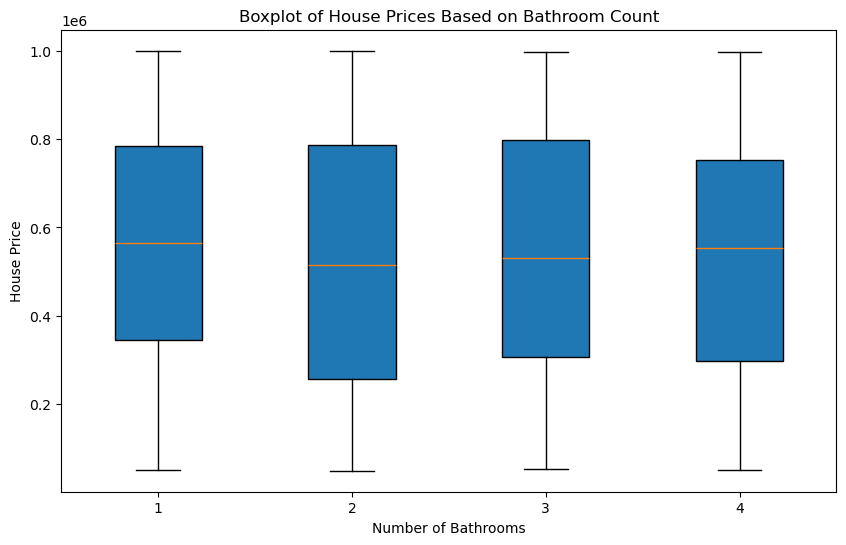

In [ ]:
# Prepare data for boxplot: list of house prices based on bathroom count
bathroom_price_data = [house_df[house_df['Bathrooms'] == b]['Price'] for b in sorted(house_df['Bathrooms'].unique())]

# Plotting the boxplot for house prices based on bathroom count
plt.figure(figsize=(10, 6))
plt.boxplot(bathroom_price_data, labels=sorted(house_df['Bathrooms'].unique()), patch_artist=True)

# Add titles and labels
plt.title('Boxplot of House Prices Based on Bathroom Count')
plt.xlabel('Number of Bathrooms')
plt.ylabel('House Price')

# Show the plot
plt.show()

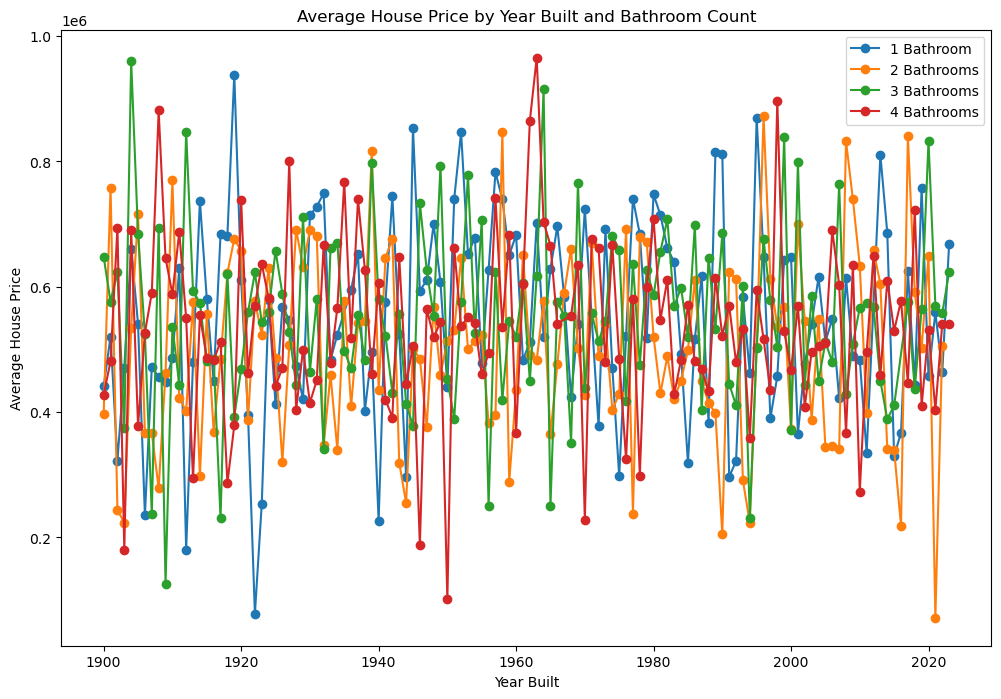

In [ ]:
# Calculate the average house price by year built for each bathroom category
avg_price_by_year_bathroom = house_df.groupby(['YearBuilt', 'Bathrooms'])['Price'].mean().reset_index()

# Filter data for houses based on bathroom count
bathroom_1 = avg_price_by_year_bathroom[avg_price_by_year_bathroom['Bathrooms'] == 1]
bathroom_2 = avg_price_by_year_bathroom[avg_price_by_year_bathroom['Bathrooms'] == 2]
bathroom_3 = avg_price_by_year_bathroom[avg_price_by_year_bathroom['Bathrooms'] == 3]
bathroom_4 = avg_price_by_year_bathroom[avg_price_by_year_bathroom['Bathrooms'] == 4]

# Plotting the line plot
plt.figure(figsize=(12, 8))
plt.plot(bathroom_1['YearBuilt'], bathroom_1['Price'], label='1 Bathroom', marker='o')
plt.plot(bathroom_2['YearBuilt'], bathroom_2['Price'], label='2 Bathrooms', marker='o')
plt.plot(bathroom_3['YearBuilt'], bathroom_3['Price'], label='3 Bathrooms', marker='o')
plt.plot(bathroom_4['YearBuilt'], bathroom_4['Price'], label='4 Bathrooms', marker='o')

# Add titles and labels
plt.title('Average House Price by Year Built and Bathroom Count')
plt.xlabel('Year Built')
plt.ylabel('Average House Price')
plt.legend()

# Show the plot
plt.show()

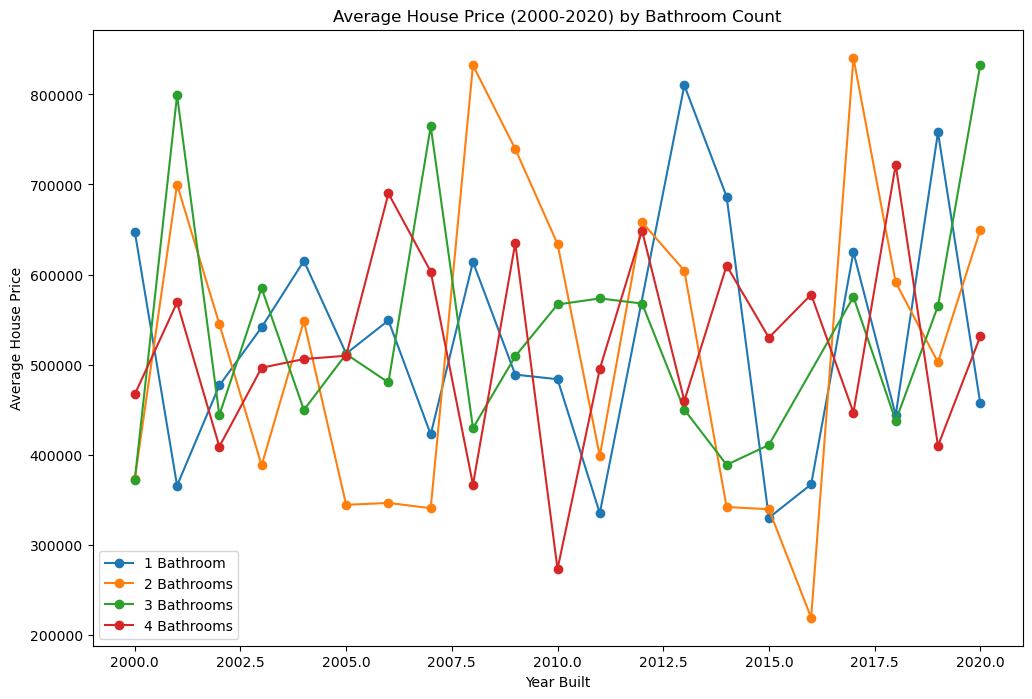

In [ ]:
# Filter data for houses built from 1900 to 1920
early_data = avg_price_by_year_bathroom[(avg_price_by_year_bathroom['YearBuilt'] >= 2000) & (avg_price_by_year_bathroom['YearBuilt'] <= 2020)]

# Filter for houses with different bathroom counts
early_bathroom_1 = early_data[early_data['Bathrooms'] == 1]
early_bathroom_2 = early_data[early_data['Bathrooms'] == 2]
early_bathroom_3 = early_data[early_data['Bathrooms'] == 3]
early_bathroom_4 = early_data[early_data['Bathrooms'] == 4]

# Plotting the line plot for early years
plt.figure(figsize=(12, 8))
plt.plot(early_bathroom_1['YearBuilt'], early_bathroom_1['Price'], label='1 Bathroom', marker='o')
plt.plot(early_bathroom_2['YearBuilt'], early_bathroom_2['Price'], label='2 Bathrooms', marker='o')
plt.plot(early_bathroom_3['YearBuilt'], early_bathroom_3['Price'], label='3 Bathrooms', marker='o')
plt.plot(early_bathroom_4['YearBuilt'], early_bathroom_4['Price'], label='4 Bathrooms', marker='o')

# Add titles and labels
plt.title('Average House Price (2000-2020) by Bathroom Count')
plt.xlabel('Year Built')
plt.ylabel('Average House Price')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Separate house prices based on bathroom count
prices_1_bath = house_df[house_df['Bathrooms'] == 1]['Price']
prices_2_bath = house_df[house_df['Bathrooms'] == 2]['Price']
prices_3_bath = house_df[house_df['Bathrooms'] == 3]['Price']
prices_4_bath = house_df[house_df['Bathrooms'] == 4]['Price']

# Perform a one-way ANOVA test to compare the mean prices between the groups
anova_result = f_oneway(prices_1_bath, prices_2_bath, prices_3_bath, prices_4_bath)
print(f"ANOVA test result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

ANOVA test result: F-statistic = 1.8722074371057578, p-value = 0.13219749577361903


In [ ]:
# Calculate observed data: count of houses based on bathroom count
observed_data = house_df['Bathrooms'].value_counts().sort_index()

# Create a DataFrame for better visualization
df = pd.DataFrame(observed_data)

# Add a column for expected values (assuming equal distribution)
df['expected'] = observed_data.mean()

# Rename the columns
df.columns = ["observed", "expected"]

# View the DataFrame
df

,observed,expected
Bathrooms,,
1,461,500.0
2,494,500.0
3,524,500.0
4,521,500.0


In [ ]:
# Calculate the critical value at 95% confidence level with 1 degree of freedom
critical_value = st.chi2.ppf(q=0.95, df=3)

# Print the critical value
print(f"The critical value: {critical_value}")

The critical value: 7.814727903251179


In [ ]:
# Run the Chi-Square test
st.chisquare(df['observed'], df['expected'])

Power_divergenceResult(statistic=5.148, pvalue=0.16127514928418166)

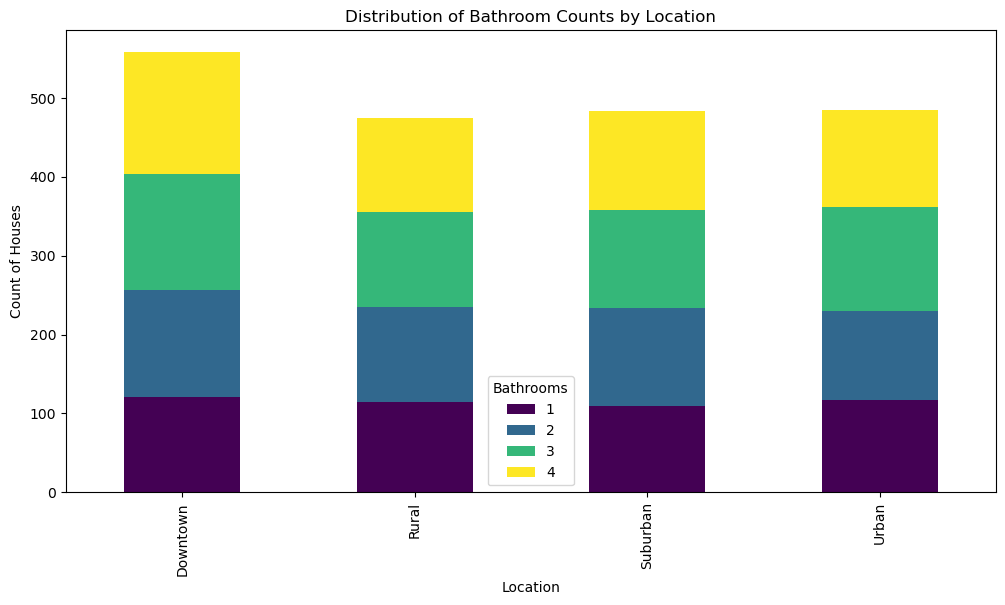

In [ ]:
# Group data by 'Location' and 'Bathroom' to see distribution
bathroom_by_location = house_df.groupby(['Location', 'Bathrooms']).size().unstack()

# Plotting a stacked bar chart to visualize bathroom counts by location
bathroom_by_location.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Distribution of Bathroom Counts by Location')
plt.xlabel('Location')
plt.ylabel('Count of Houses')
plt.legend(title='Bathrooms')
plt.show()

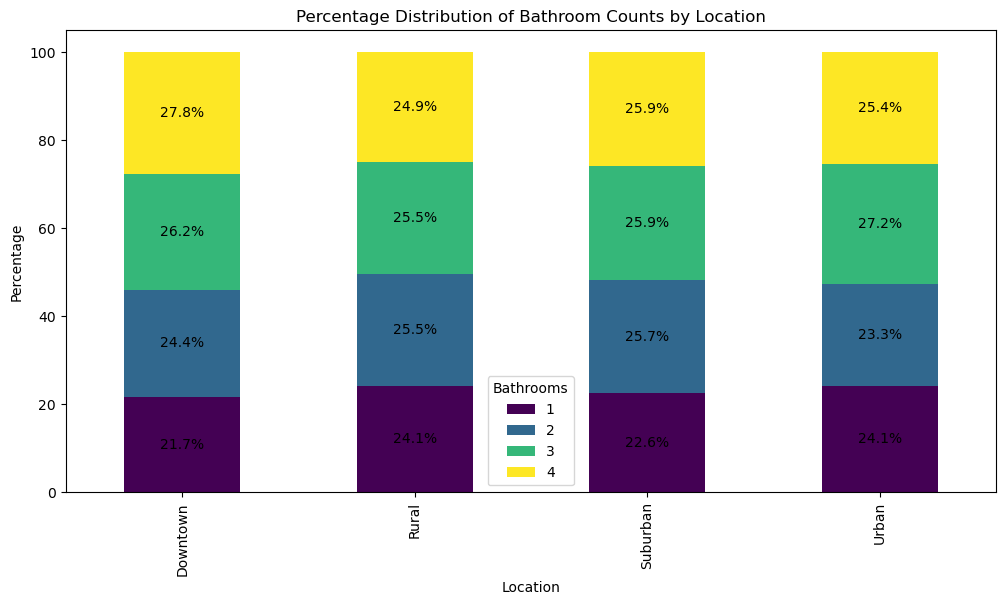

In [ ]:
# Calculate percentage distribution of bathrooms counts by location
bathroom_by_location_pct = bathroom_by_location.div(bathroom_by_location.sum(axis=1), axis=0) * 100

# Plot the percentage distribution
ax = bathroom_by_location_pct.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Percentage Distribution of Bathroom Counts by Location')
plt.xlabel('Location')
plt.ylabel('Percentage')

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0:  # Only show non-zero values
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.show()

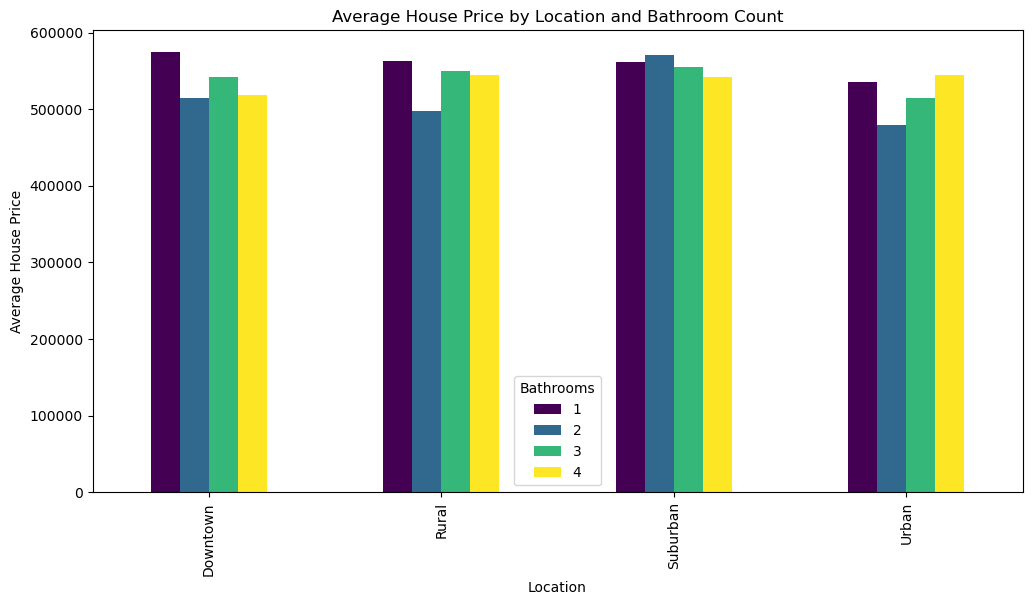

In [ ]:
# Group by location and bathroom counts to calculate average prices
avg_price_by_location_bathroom = house_df.groupby(['Location', 'Bathrooms'])['Price'].mean().unstack()

# Plot the average house price by location and bathroom counts
avg_price_by_location_bathroom.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Average House Price by Location and Bathroom Count')
plt.xlabel('Location')
plt.ylabel('Average House Price')
plt.legend(title='Bathrooms')
plt.show()

In [57]:
# Count the number of house locations
location_count = house_df['Location'].value_counts()

# Display the results
print(location_count)

Location
Downtown    558
Urban       485
Suburban    483
Rural       474
Name: count, dtype: int64


In [59]:
summary_stats_df = house_df.groupby('Location')['Price'].agg(
    Mean="mean",
    Median="median",
    Variance="var",
    Std_Dev="std",
    SEM="sem"
)

# Display the summary statistics
summary_stats_df

,Mean,Median,Variance,Std_Dev,SEM
Location,,,,,
Downtown,536059.661290,532340.5,7.580077e+10,275319.395682,11655.199406
Rural,538613.943038,527560.0,7.674999e+10,277037.894087,12724.771910
Suburban,557416.333333,589618.0,7.111405e+10,266672.175503,12134.004133
Urban,518963.548454,520917.0,8.179491e+10,285998.094535,12986.504500


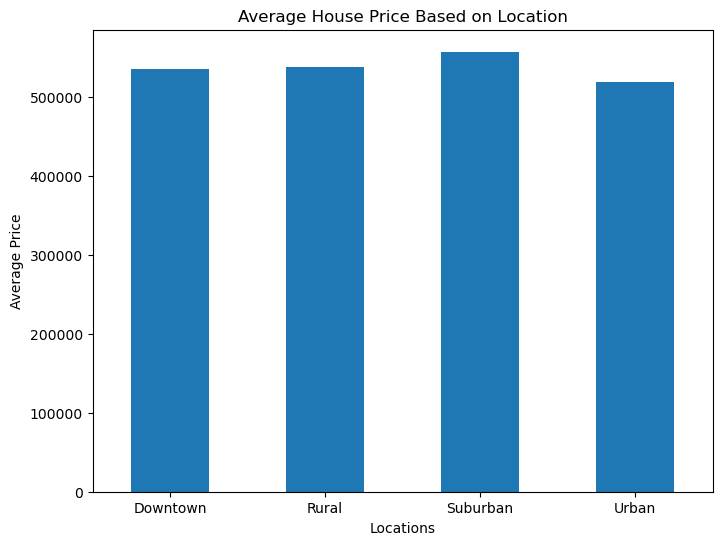

In [61]:
# Plotting the average house prices based on Location
location_price_comparison=summary_stats_df["Mean"]
location_price_comparison.plot(kind='bar', figsize=(8, 6))
plt.title('Average House Price Based on Location')
plt.xlabel('Locations')
plt.ylabel('Average Price')
plt.xticks(ticks=[0, 1,2,3], labels=['Downtown','Rural','Suburban','Urban'], rotation=0)
plt.show()
# Finish the plot

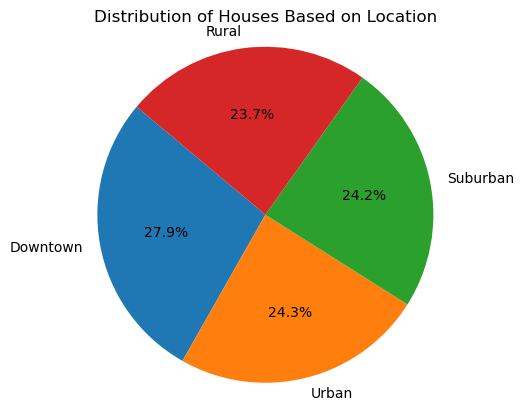

In [63]:
# Get the count of house locations
location_count = house_df['Location'].value_counts()

# Make the pie chart based on location
garage_pie = location_count.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    title='Distribution of Houses Based on Location',
    ylabel=''  # Set ylabel to empty to avoid label overlap
)

# Make the axis equal to ensure the pie chart is circular
plt.axis('equal')

# Show the plot
plt.show()

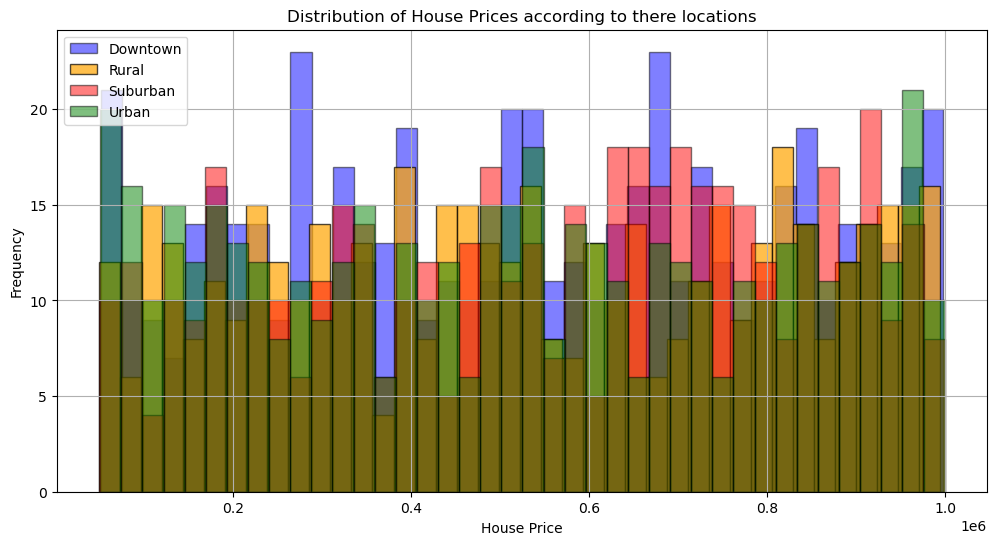

In [65]:
# Plotting a histogram to compare the distribution of house prices Based on there location

# Set the size of the figure
plt.figure(figsize=(12, 6))

# Plot a histogram for house prices for houses in Downtown areas
house_df[house_df['Location'] == 'Downtown']['Price'].hist(
    alpha=0.5, label='Downtown', bins=40, color='blue', edgecolor='black'
)

# Plot a histogram for house prices for houses in rural areas
house_df[house_df['Location'] == 'Rural']['Price'].hist(
    alpha=0.7, label='Rural', bins=40, color='orange', edgecolor='black'
    
)
# Plot a histogram for house prices for houses in Suburban areas
house_df[house_df['Location'] == 'Suburban']['Price'].hist(
    alpha=0.5, label='Suburban', bins=40, color='red', edgecolor='black'
)
# Plot a histogram for house prices for houses in Urban areas
house_df[house_df['Location'] == 'Urban']['Price'].hist(
    alpha=0.5, label='Urban', bins=40, color='green', edgecolor='black'
)

# Add title and labels
plt.title('Distribution of House Prices according to there locations')
plt.xlabel('House Price')
plt.ylabel('Frequency')

# Add legend to indicate which distribution represents house locations
plt.legend()

# Display the plot
plt.show()


In [71]:
# Calculate Quartiles and Identify Outliers for House Prices Based on Garage Presence

# Calculate the 25th, 50th (median), and 75th percentiles for house prices based on Location
quartiles = house_df.groupby('Location')['Price'].quantile([0.25, 0.5, 0.75]).unstack()

# Display the quartiles for each location group
print("Quartiles for house prices based on there locations:\n", quartiles)

# Calculate the Interquartile Range (IQR)
IQR = quartiles[0.75] - quartiles[0.25]

# Calculate lower and upper bounds for detecting outliers
lower_bound = quartiles[0.25] - 1.5 * IQR
upper_bound = quartiles[0.75] + 1.5 * IQR

# Display the IQR, lower and upper bounds
print("\nInterquartile Range (IQR):\n", IQR)
print("\nLower Bound for Outliers:\n", lower_bound)
print("\nUpper Bound for Outliers:\n", upper_bound)

# Identify potential outliers for Downtown houses
outliers_Downtown = house_df[(house_df['Location'] == 'Downtown') & 
                                ((house_df['Price'] < lower_bound['Downtown']) | 
                                 (house_df['Price'] > upper_bound['Downtown']))]
# Identify potential outliers for rural houses
outliers_rural = house_df[(house_df['Location'] == 'Rural') & 
                             ((house_df['Price'] < lower_bound['Rural']) | 
                              (house_df['Price'] > upper_bound['Rural']))]
# Identify potential outliers for suburban houses
outliers_suburban = house_df[(house_df['Location'] == 'Suburban') & 
                             ((house_df['Price'] < lower_bound['Suburban']) | 
                              (house_df['Price'] > upper_bound['Suburban']))]
# Identify potential outliers for suburban houses
outliers_urban = house_df[(house_df['Location'] == 'Urban') & 
                             ((house_df['Price'] < lower_bound['Urban']) | 
                              (house_df['Price'] > upper_bound['Urban']))]
# Display the number of outliers for each group
print("\nNumber of outliers for houses in Downtown areas:",outliers_Downtown.shape[0])
print("\nNumber of outliers for houses in Rural areas:",outliers_rural.shape[0])
print("\nNumber of outliers for houses in suburban areas:", outliers_suburban.shape[0])
print("\nNumber of outliers for houses in urban areas:", outliers_urban.shape[0])


Quartiles for house prices based on there locations:
                0.25      0.50       0.75
Location                                
Downtown  298737.75  532340.5  773654.75
Rural     302311.00  527560.0  795844.75
Suburban  328429.00  589618.0  777552.00
Urban     265196.00  520917.0  778927.00

Interquartile Range (IQR):
 Location
Downtown    474917.00
Rural       493533.75
Suburban    449123.00
Urban       513731.00
dtype: float64

Lower Bound for Outliers:
 Location
Downtown   -413637.750
Rural      -437989.625
Suburban   -345255.500
Urban      -505400.500
dtype: float64

Upper Bound for Outliers:
 Location
Downtown    1486030.250
Rural       1536145.375
Suburban    1451236.500
Urban       1549523.500
dtype: float64

Number of outliers for houses in Downtown areas: 0

Number of outliers for houses in Rural areas: 0

Number of outliers for houses in suburban areas: 0

Number of outliers for houses in urban areas: 0


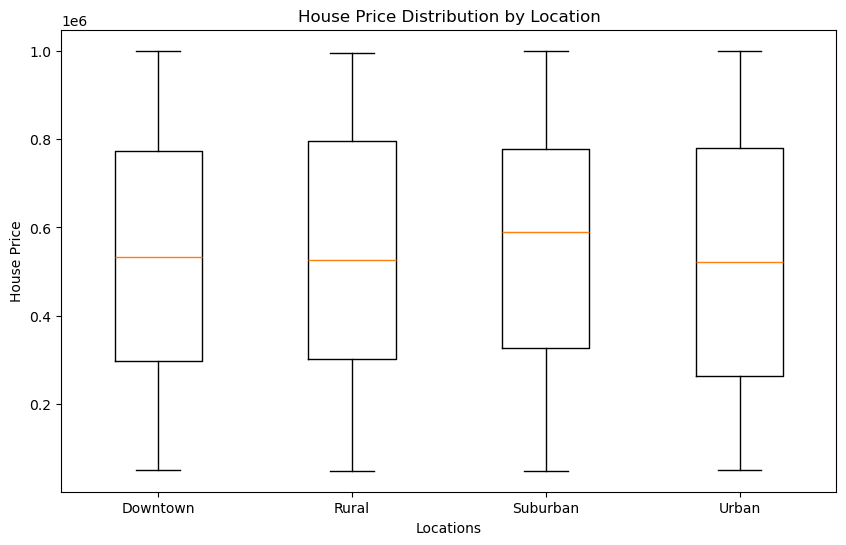

In [73]:
# Prepare data for boxplot: list of house prices for each Location
garage_price_data = [
    house_df[house_df['Location'] == 'Downtown']['Price'],
    house_df[house_df['Location'] == 'Rural']['Price'],
     house_df[house_df['Location'] == 'Suburban']['Price'],
   house_df[house_df['Location'] == 'Urban']['Price']
]

# Plotting the boxplot for house prices based on Location
plt.figure(figsize=(10, 6))
plt.boxplot(garage_price_data, labels=['Downtown','Rural','Suburban','Urban'], 
            flierprops=dict(marker='o', color='red', markersize=8))

# Add titles and labels
plt.title('House Price Distribution by Location')
plt.xlabel('Locations')
plt.ylabel('House Price')

# Show the plot
plt.show()

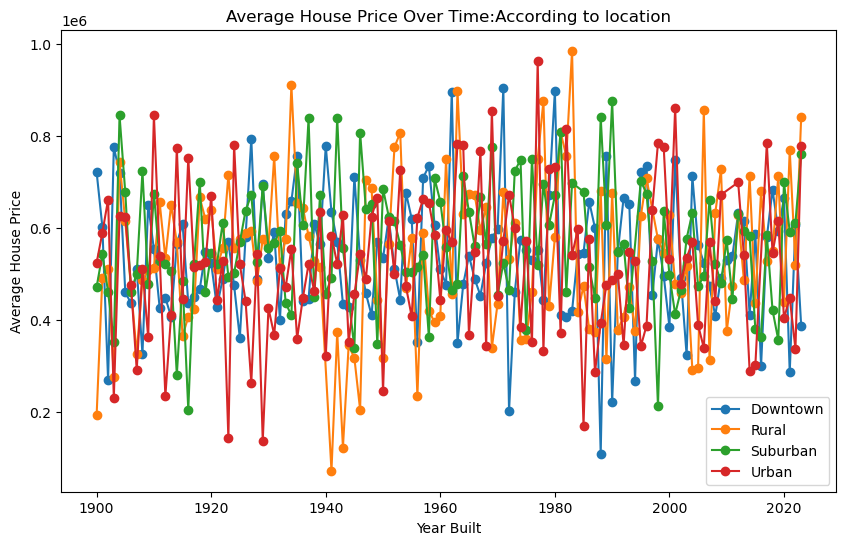

In [75]:
# Calculate the average house price by year built for each Location category
avg_price_by_year = house_df.groupby(['YearBuilt', 'Location'])['Price'].mean().reset_index()

# Filter data for by Location
Downtown_data= avg_price_by_year[avg_price_by_year['Location'] == 'Downtown']
Rural_data = avg_price_by_year[avg_price_by_year['Location'] == 'Rural']
Suburban_data= avg_price_by_year[avg_price_by_year['Location'] == 'Suburban']
Urban_data = avg_price_by_year[avg_price_by_year['Location'] == 'Urban']
# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(Downtown_data['YearBuilt'], Downtown_data['Price'], label='Downtown', marker='o')
plt.plot(Rural_data['YearBuilt'], Rural_data['Price'], label='Rural', marker='o')
plt.plot(Suburban_data['YearBuilt'], Suburban_data['Price'], label='Suburban', marker='o')
plt.plot(Urban_data['YearBuilt'], Urban_data['Price'], label='Urban', marker='o')


# Add titles and labels
plt.title('Average House Price Over Time:According to location')
plt.xlabel('Year Built')
plt.ylabel('Average House Price')
plt.legend()

# Show the plot
plt.show()


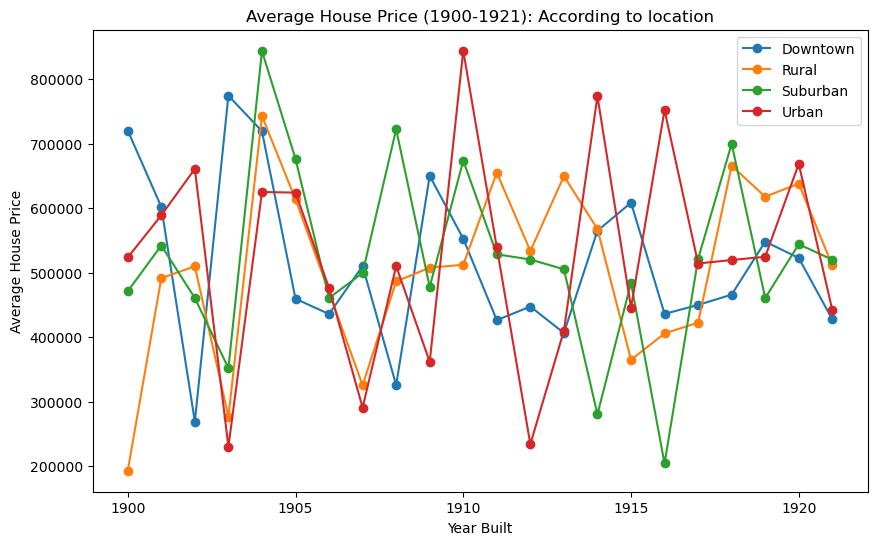

In [77]:
# Filter data for houses built from 1900 to 1920
early_data = avg_price_by_year[(avg_price_by_year['YearBuilt'] >= 1900) & (avg_price_by_year['YearBuilt'] <= 1921)]

# Filter for houses by location
early_Downtown = early_data[early_data['Location'] == 'Downtown']
early_Rural = early_data[early_data['Location'] == 'Rural']
early_Suburban = early_data[early_data['Location'] == 'Suburban']
early_Urban = early_data[early_data['Location'] == 'Urban']
# Plotting the line plot for early years
plt.figure(figsize=(10, 6))
plt.plot(early_Downtown['YearBuilt'],early_Downtown['Price'], label='Downtown', marker='o')
plt.plot(early_Rural['YearBuilt'], early_Rural['Price'], label='Rural', marker='o')
plt.plot(early_Suburban['YearBuilt'], early_Suburban['Price'], label='Suburban', marker='o')
plt.plot(early_Urban['YearBuilt'], early_Urban['Price'], label='Urban', marker='o')

# Add titles and labels
plt.title('Average House Price (1900-1921): According to location')
plt.xlabel('Year Built')
plt.ylabel('Average House Price')
plt.legend()

# Show the plot
plt.show()

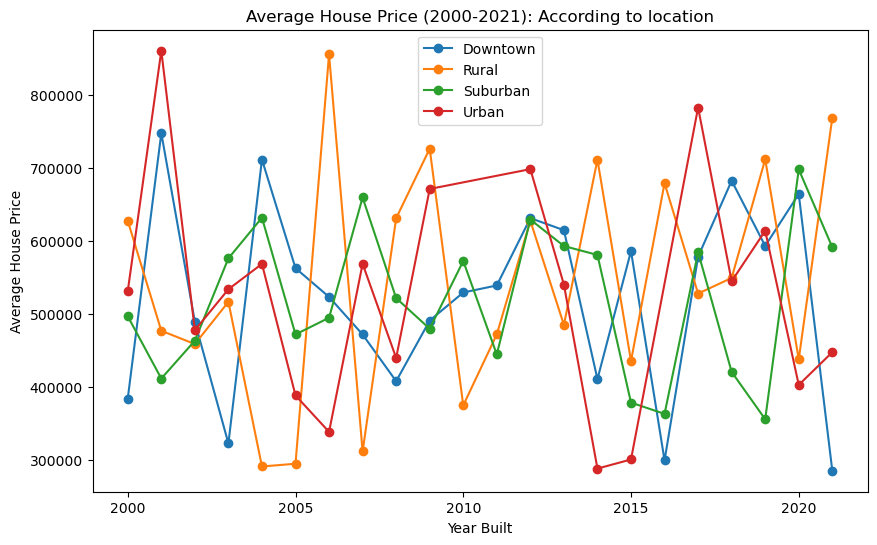

In [79]:
# Filter data for houses built from 1900 to 1920
early_data = avg_price_by_year[(avg_price_by_year['YearBuilt'] >= 2000) & (avg_price_by_year['YearBuilt'] <= 2021)]

# Filter for houses by location
early_Downtown = early_data[early_data['Location'] == 'Downtown']
early_Rural = early_data[early_data['Location'] == 'Rural']
early_Suburban = early_data[early_data['Location'] == 'Suburban']
early_Urban = early_data[early_data['Location'] == 'Urban']
# Plotting the line plot for early years
plt.figure(figsize=(10, 6))
plt.plot(early_Downtown['YearBuilt'],early_Downtown['Price'], label='Downtown', marker='o')
plt.plot(early_Rural['YearBuilt'], early_Rural['Price'], label='Rural', marker='o')
plt.plot(early_Suburban['YearBuilt'], early_Suburban['Price'], label='Suburban', marker='o')
plt.plot(early_Urban['YearBuilt'], early_Urban['Price'], label='Urban', marker='o')

# Add titles and labels
plt.title('Average House Price (2000-2021): According to location')
plt.xlabel('Year Built')
plt.ylabel('Average House Price')
plt.legend()

# Show the plot
plt.show()

In [81]:
# Separate house prices for houses by there locations
downtown_prices = house_df[house_df['Location'] == 'Downtown']['Price']
Rural_prices = house_df[house_df['Location'] == 'Rural']['Price']
suburban_prices = house_df[house_df['Location'] == 'Suburban']['Price']
Urban_prices=house_df[house_df['Location']=='Urban']['Price']

# Perform a one-way ANOVA test to compare the mean prices between the groups
st.f_oneway(downtown_prices, Rural_prices,suburban_prices,Urban_prices)

F_onewayResult(statistic=1.5713960722801037, pvalue=0.1943220538614731)

In [83]:
# Calculate observed data: count of house locations
observed = pd.Series([house_df['Location'].value_counts()['Downtown'], 
house_df['Location'].value_counts()['Rural'], house_df['Location'].value_counts()['Suburban'],house_df['Location'].value_counts()['Urban']],
index=["Downtown", "Rural","Suburban","Urban"])

# Create a DataFrame for better visualization
df = pd.DataFrame([observed]).T

# Add a column for expected values (assuming equal distribution)
df[1] = observed.sum() / 4

# Rename the columns
df.columns = ["observed", "expected"]

# View the DataFrame
df

,observed,expected
Downtown,558,500.0
Rural,474,500.0
Suburban,483,500.0
Urban,485,500.0


In [85]:
# Calculate the critical value at 95% confidence level with 3 degree of freedom
critical_value = st.chi2.ppf(q=0.95, df=3)

# Print the critical value
print(f"The critical value: {critical_value}")

The critical value: 7.814727903251179


In [87]:
# Run the Chi-Square test
st.chisquare(df['observed'], df['expected'])

Power_divergenceResult(statistic=9.107999999999999, pvalue=0.027888901387019212)

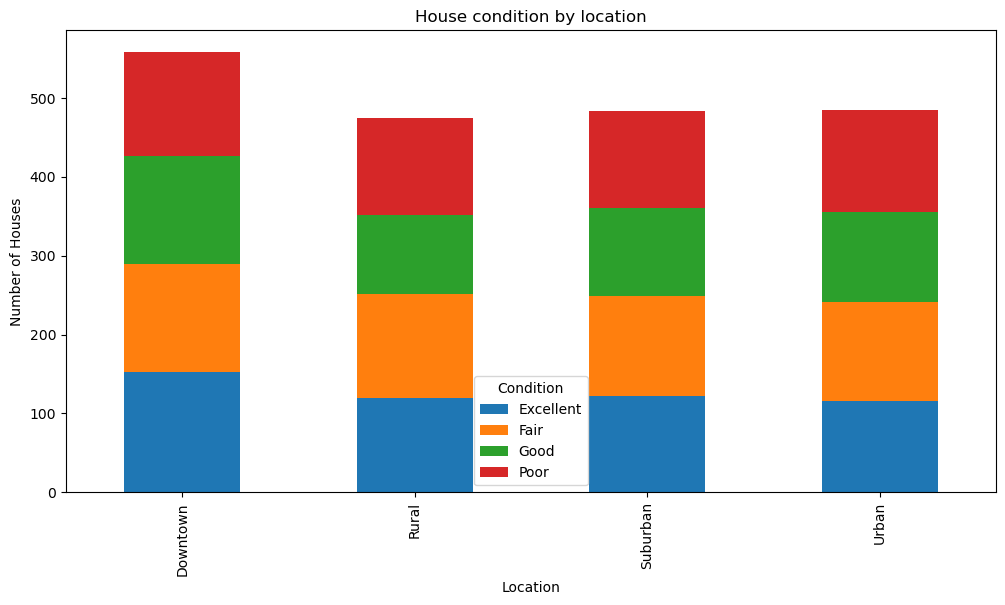

In [89]:
# Group data by 'Location' and 'Condition' to see distribution
condition_by_location = house_df.groupby(['Location', 'Condition']).size().unstack().fillna(0)

# Plotting a stacked bar chart to visualize house conditions by location
condition_by_location.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('House condition by location')
plt.xlabel('Location')
plt.ylabel('Number of Houses')
plt.show()

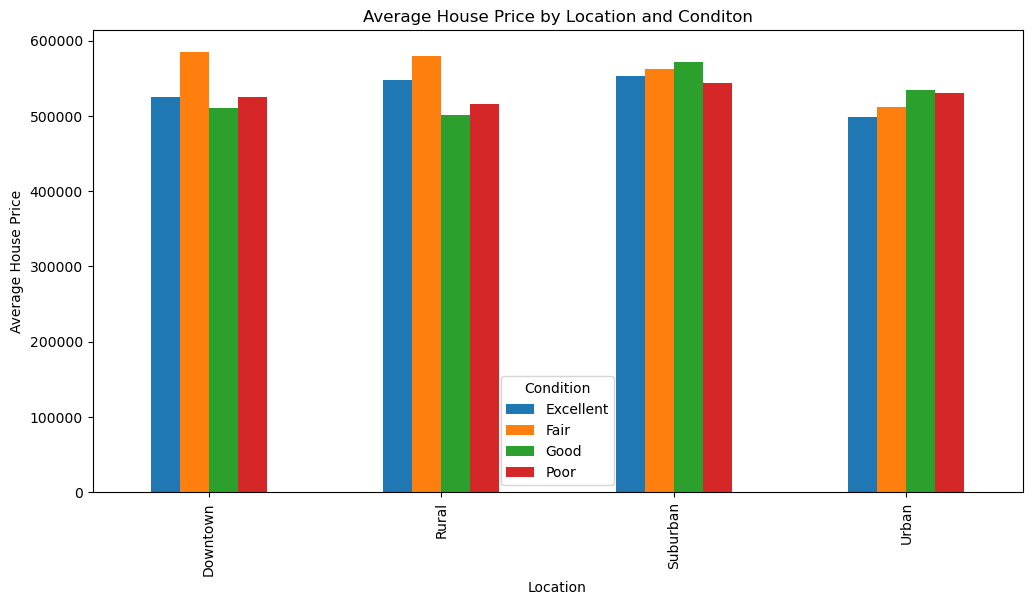

In [91]:


# Group by location and condition to calculate average prices
avg_price_loc_garage = house_df.groupby(['Location', 'Condition'])['Price'].mean().unstack()

# Plot the average house price by location and garage presence
avg_price_loc_garage.plot(kind='bar', figsize=(12, 6))
plt.title('Average House Price by Location and Conditon')
plt.xlabel('Location')
plt.ylabel('Average House Price')
plt.show()